# Importing The Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control 
import tensorflow as tf

# Calculate Routh-Hourwitz Criterion

In [2]:
#Class to call RH_Criterion
class RH_Criterion:

    def __init__(self,coeff,s1_matrice,s2_matrice):
        
        #Input Coeff's (Up to 2nd order)
        self.coeff = coeff        #initialize coeffs
        self.s1_matrice = s1_matrice   #set for s1 coeffs
        self.s2_matrice = s2_matrice   #set for s2 coeffs
        self.s3_matrice = [-np.linalg.det([s1_matrice,s2_matrice])/coeff[1], 0] #set for s3 coeffs

        #Return Value
        self.CalculateRH = self.Calculate_RH(self.coeff,
                                             self.s1_matrice,
                                             self.s2_matrice,
                                             self.s3_matrice)
    
    def Calculate_RH(self,coeff,s1_matrice,s2_matrice,s3_matrice):
        
        #Identify the criterion
        Rhcriterion = []
        if (s1_matrice[0],s2_matrice[0],s3_matrice[0] > 0 | s1_matrice[0],s2_matrice[0],s3_matrice[0] < 0):
            Rhcriterion.append("this system is stable")
        else:
            Rhcriterion.append("this system is not stable")

        #Calculate the discriminant
        Determinant = (coeff[1]**2) - (4*coeff[0]*coeff[2])

        return Rhcriterion,Determinant

if __name__ == "__main__":

    #Input Coeff's (Up to 2nd order)
    coeff = ([1,12,400])         #initialize coeffs
    s1_matrice = [coeff[0],coeff[2]]   #set for s1 coeffs
    s2_matrice = [coeff[1],0]   #set for s2 coeffs
    s3_matrice = [-np.linalg.det([s1_matrice,s2_matrice])/coeff[1], 0] #set for s3 coeffs

    print(RH_Criterion(coeff,s1_matrice,s2_matrice).CalculateRH)

(['this system is stable'], -1456)


# Calculate Root Locus


       1
----------------
s^2 + 12 s + 400

(array([[-6.  -19.07878403j, -6.  +19.07878403j],
       [-6.  -19.07878403j, -6.  +19.07878403j],
       [-6.  -19.26043317j, -6.  +19.26043317j],
       [-6.  -19.44038506j, -6.  +19.44038506j],
       [-6.  -19.61868643j, -6.  +19.61868643j],
       [-6.  -19.79538186j, -6.  +19.79538186j],
       [-6.  -19.97051398j, -6.  +19.97051398j],
       [-6.  -20.14412357j, -6.  +20.14412357j],
       [-6.  -20.31624965j, -6.  +20.31624965j],
       [-6.  -20.48692963j, -6.  +20.48692963j],
       [-6.  -20.65619935j, -6.  +20.65619935j],
       [-6.  -20.82409319j, -6.  +20.82409319j],
       [-6.  -20.99064417j, -6.  +20.99064417j],
       [-6.  -21.15588402j, -6.  +21.15588402j],
       [-6.  -21.3198432j , -6.  +21.3198432j ],
       [-6.  -21.48255106j, -6.  +21.48255106j],
       [-6.  -21.6440358j , -6.  +21.6440358j ],
       [-6.  -21.8043246j , -6.  +21.8043246j ],
       [-6.  -21.96344365j, -6.  +21.96344365j],
       [-6.  -22.121418

(<Axes: title={'center': 'Root Locus'}, xlabel='real part', ylabel='imaginary part'>,
 <Axes: title={'center': 'Impulse Response'}, xlabel='Time (s)', ylabel='Amplitude'>,
 None)

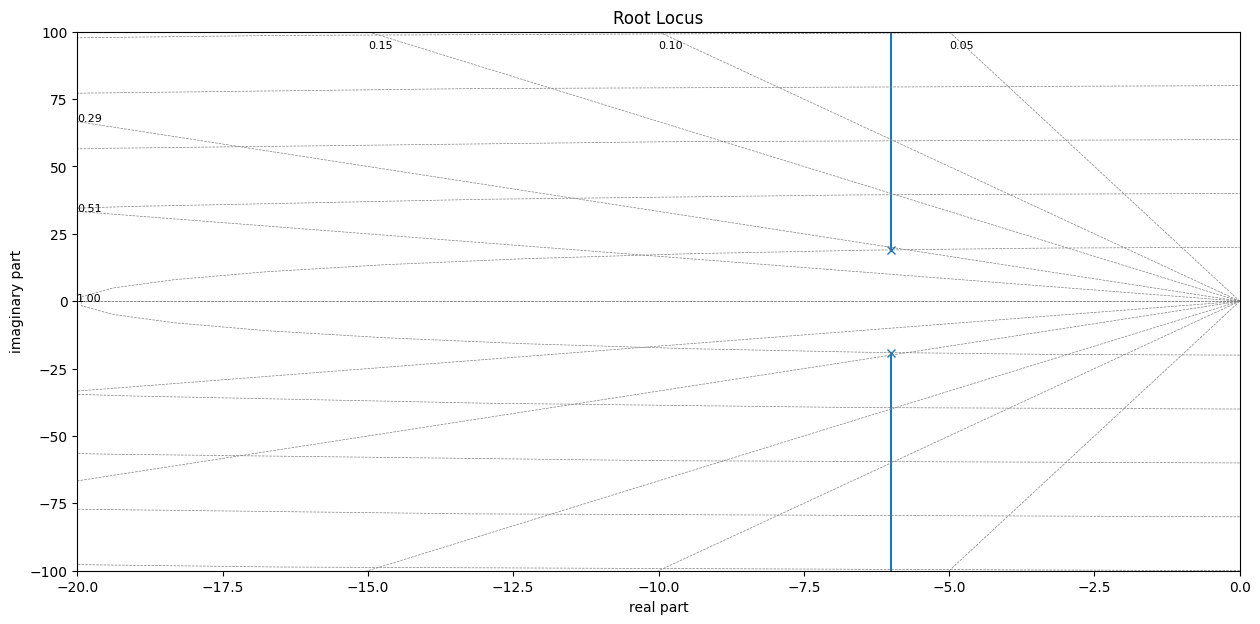

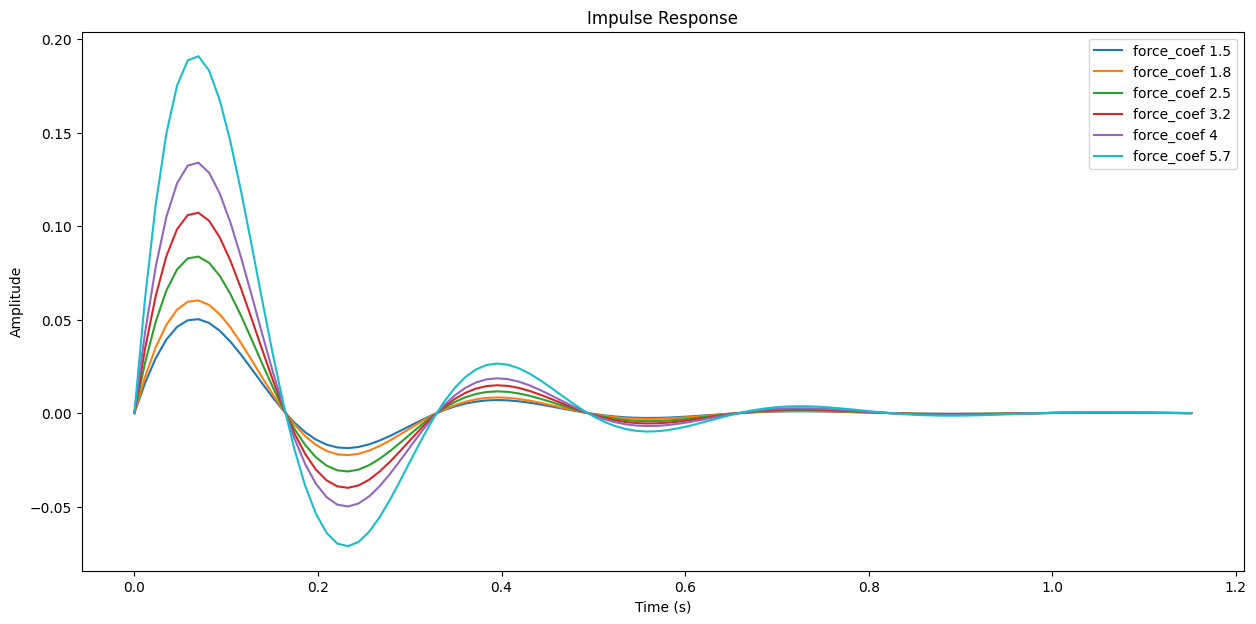

In [ ]:
def Transfer_function(coeff):
    
    force_coef = [1.5,1.8,2.5,3.2,4,5.7]
    color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf']
    transfer_function = control.TransferFunction.s
    #transfer_function = control.TransferFunction([1],coeff)

    fig,ax = plt.subplots(figsize = (15,7))
    rlist, klist = control.rlocus(transfer_function, xlim=[-20,0], ylim=[-100,100])
    ax.set_xlabel("real part")
    ax.set_ylabel("imaginary part")
    ax.set_title("Root Locus")

    print(f'{transfer_function}\n{control.rlocus(transfer_function,plot=False)}')

    fig.savefig("Root Locus")

    time, response = control.impulse_response(transfer_function)

    fig,bx = plt.subplots(figsize = (15,7))

    for i in range (0,len(force_coef)):

        bx.plot(time, force_coef[i]*response, color = color[i], label = f'force_coef {force_coef[i]}')
        bx.set_title("Impulse Response")
        bx.set_xlabel("Time (s)")
        bx.set_ylabel("Amplitude")
        bx.legend()
    
    fig.savefig("Time Respond(s)")
    return ax,bx,print(f'{transfer_function}\n{control.rlocus(transfer_function,plot=False)}')

Transfer_function(coeff)


NameError: name 's' is not defined